<a href="https://colab.research.google.com/github/Doris6038/New-TA/blob/master/Copy_of_Titanic_1027_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入資料套件

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.5)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 讀取資料檔案

In [3]:
# acquire data
from google.colab import files

uploads = files.upload()
df =  pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')



In [0]:
#練習刪除此單元格
#練習刪除此單元格
#練習刪除此單元格

# 查看資料

In [4]:
# 查看資料本身
print("data set shape: ", df.shape) # 看有幾個rows & columns
df.head() #顯示前五筆資料


data set shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
print("training set shape: ", df.shape )
print("testing set shape: ", df_test.shape ) # 少一筆 --> 這份是要來預測的，故沒有Survived欄位
df_test.head()

training set shape:  (891, 12)
testing set shape:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 資料欄位解釋



pclass: 票的等級。1st = 最高 &emsp;2nd = 第二等 &emsp;3rd = 第三等

age: 年齡。如果年齡為估計值，則以小數顯示。

sibsp: 兄弟姊妹及配偶

parch: 父母親 (parents) + 小孩 (children)

Embarked:上船地點。C = Cherbourg, Q = Queenstown, S = Southampton




In [6]:
df.info()
# Cabin , Age ,Embarked 有缺值 -->要補值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# 計算量
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
df["Age"].mean()

29.69911764705882

In [9]:
df["Age"].median()

28.0

## **動手試試看- 0**

In [10]:
"""type between this"""

df

"""type between this"""

'type between this'

## 動手試試看解答- 0

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 查看資料

In [12]:
# 抓出variance
df.var() 

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [13]:
# 抓出標準差
df.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [14]:
#observe the numerical data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 資料視覺化

In [0]:
# visualization
import seaborn as sns
sns.set(style = "white")
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.5)

## 散布圖

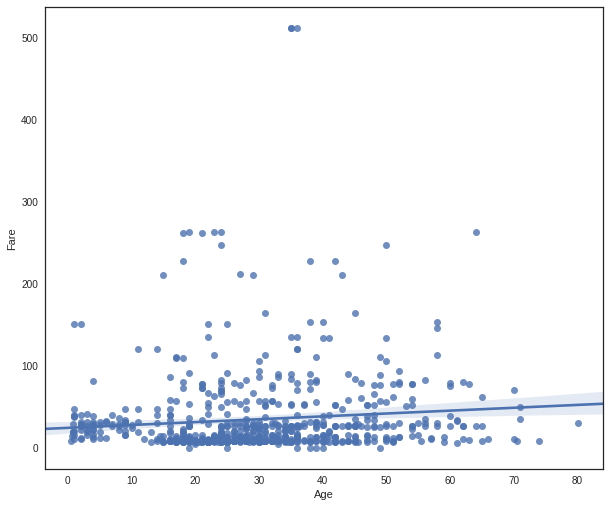

In [0]:
# 畫出scatter plot
sns.regplot(x = df.Age, y = df.Fare, dropna = True)

## 動手試試看- 1

In [17]:
# 動手試試看(1)
"""type between this"""
sns.regplot(x=df.Survised, y = df.Pclass,fit_reg=false)



"""type between this"""


AttributeError: ignored

## 動手試試看解答- 1

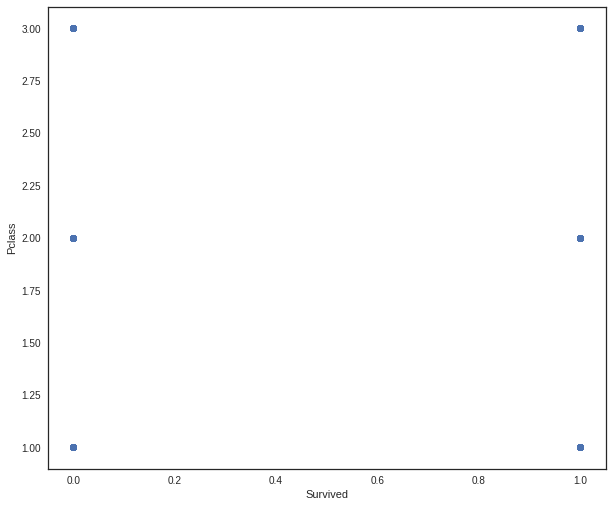

In [18]:
sns.regplot(x = df.Survived, y = df.Pclass, fit_reg = False)

## 直方圖

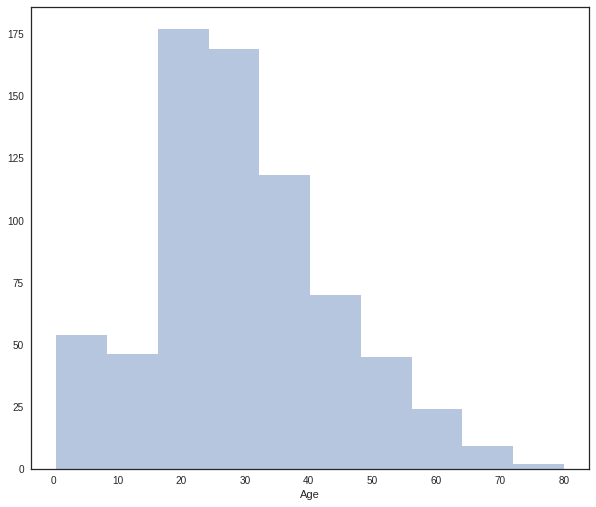

In [19]:
sns.distplot(df["Age"].dropna(), bins = 10, kde = False) #右偏

## 動手試試看- 2

'type between this'

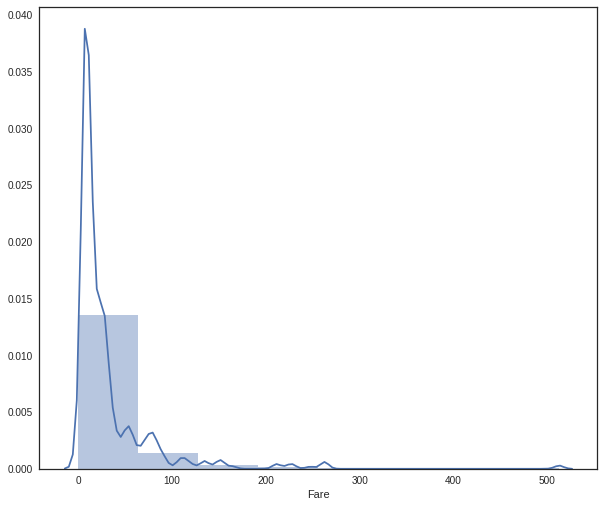

In [20]:
"""type between this"""
sns.distplot(df["Fare"], bins = 8)

"""type between this"""


## 動手試試看解答- 2

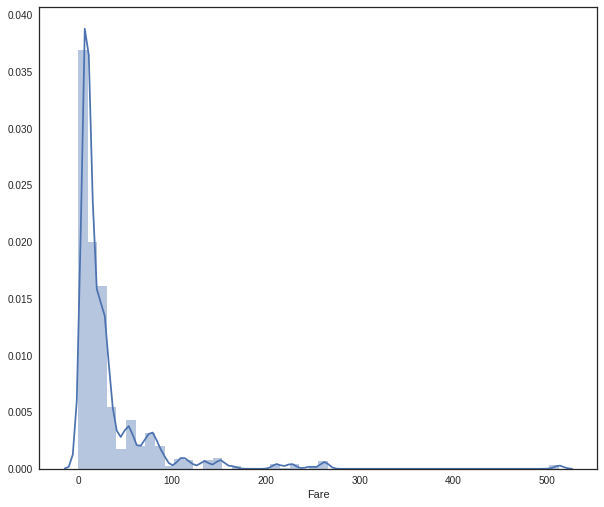

In [0]:
sns.distplot(df["Fare"])

## 直方圖的比較

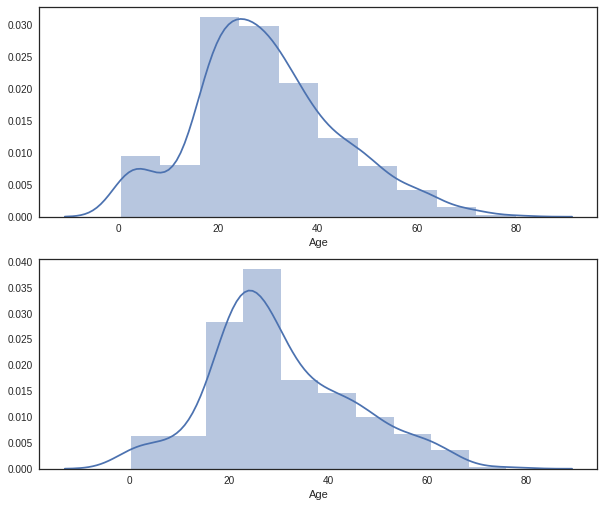

In [21]:
fig, axes = plt.subplots(2)
sns.distplot(df.Age.dropna(),bins = 10, ax= axes[0])
sns.distplot(df_test.Age.dropna(), bins = 10, ax= axes[1])

## 箱形圖

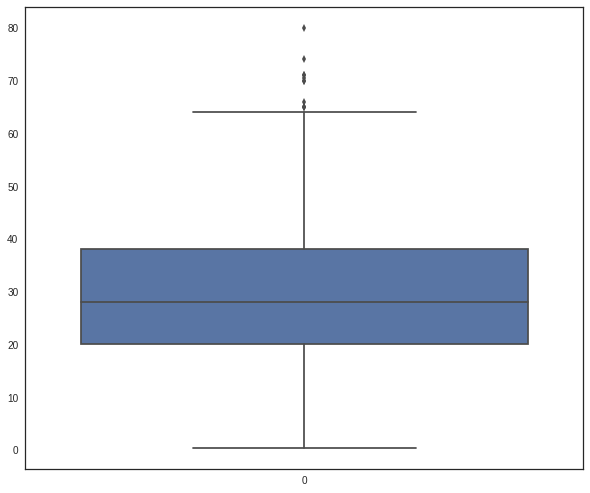

In [22]:
sns.boxplot(data = df["Age"])

## 動手試試看- 3

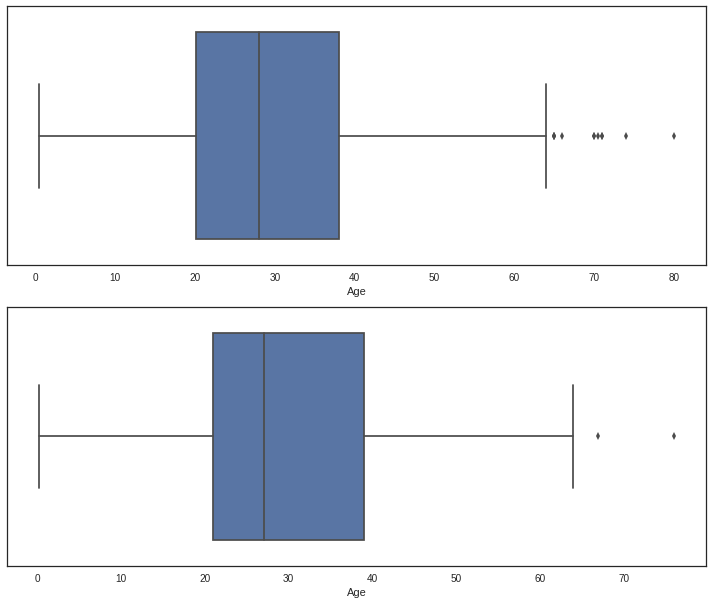

In [23]:
fig, axes = plt.subplots(2)

"""type between this"""

sns.boxplot(df.Age, ax = axes[0])
sns.boxplot(df_test.Age, ax = axes[1])

"""type between this"""

plt.tight_layout() #自動排版


## 動手試試看解答- 3

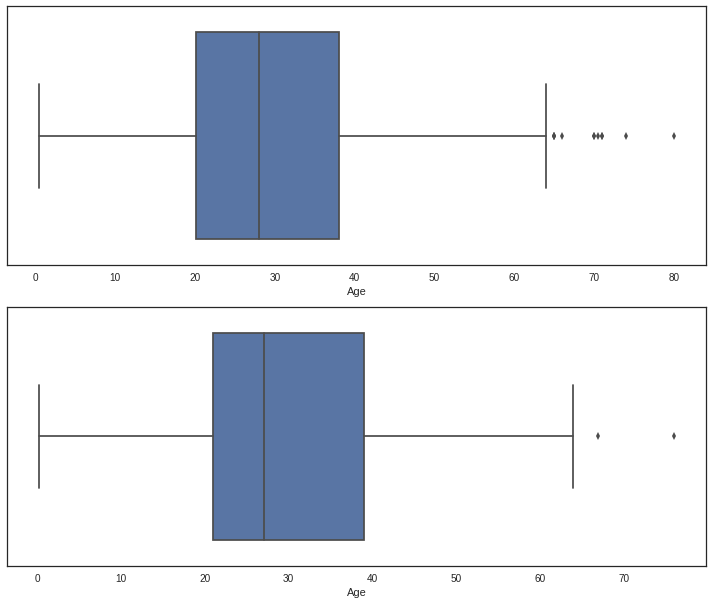

In [0]:
fig, axes = plt.subplots(2)

"""type between this"""

sns.boxplot(df.Age, ax = axes[0])
sns.boxplot(df_test.Age, ax = axes[1])

"""type between this"""

plt.tight_layout() #自動排版


## 觀察類別資料

In [24]:
# observe the categorical data
df.describe(include=['O']) # string type data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",male,1601,B96 B98,S
freq,1,577,7,4,644


## 長條圖

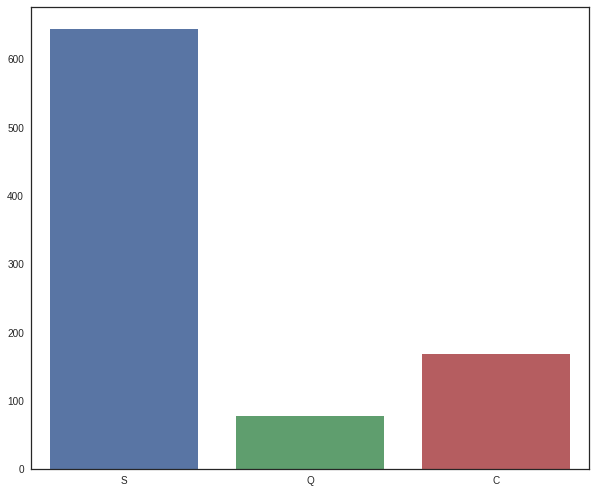

In [25]:
size = [sum(df.Embarked == "S"), sum(df.Embarked == "Q"), sum(df.Embarked == "C")]
sns.barplot(x = ["S", "Q", "C"], y = size)

## 動手試試看- 4

'type between this'

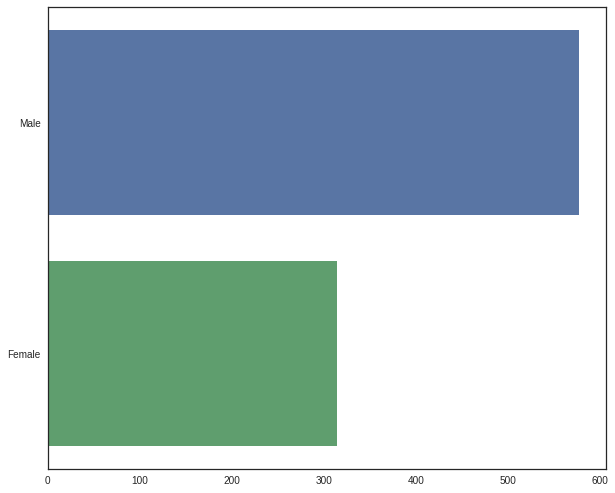

In [30]:
"""type between this"""
size = [sum(df.Sex == "male"), sum(df.Sex == "female")]
sns.barplot(y = ["Male", "Female"], x = size)



"""type between this"""

## 動手試試看解答- 4

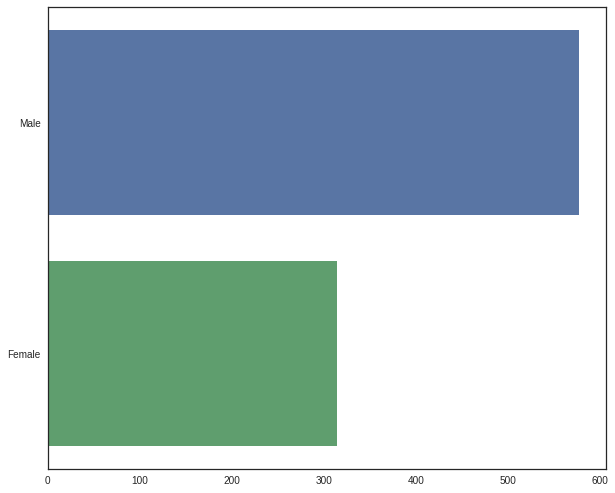

In [0]:
size = [sum(df.Sex == "male"), sum(df.Sex == "female")]
sns.barplot(y = ["Male", "Female"], x = size)

## 圓餅圖

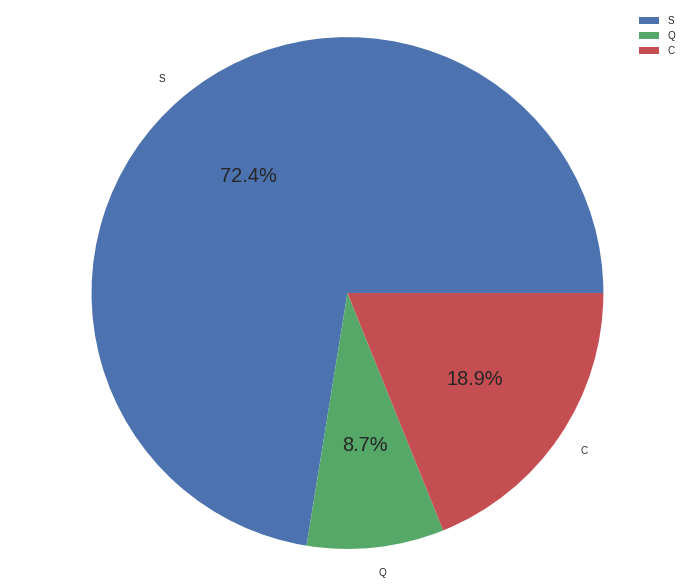

In [0]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0
size = [sum(df.Embarked == "S"), sum(df.Embarked == "Q"), sum(df.Embarked == "C")]
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=["S","Q","C"],autopct='%1.1f%%')
ax1.axis('equal')
plt.legend(labels = ["S","Q","C"], loc= "best")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

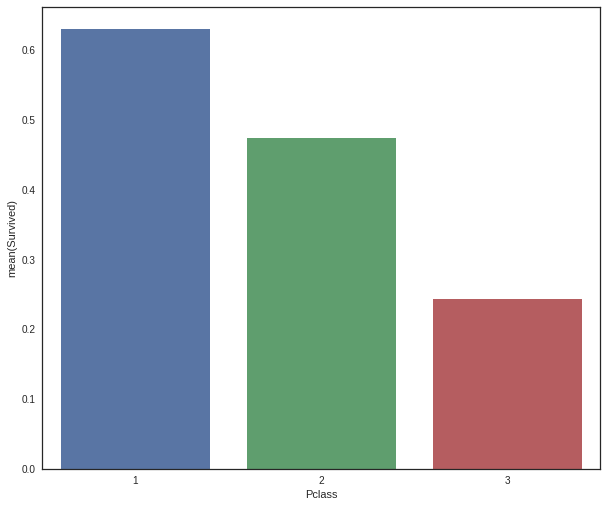

In [0]:
sns.barplot(x = "Pclass", y = "Survived", data = df, ci= None)

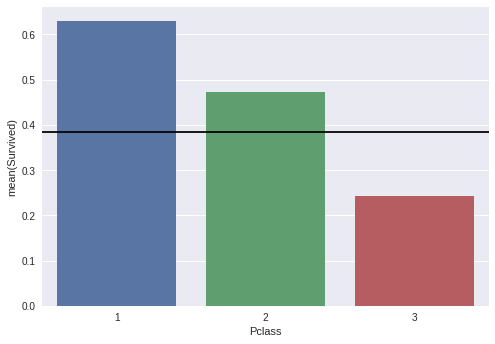

In [0]:
sns.set(style = "darkgrid")
sns.barplot(x = "Pclass", y = "Survived", data = df, ci = None)
plt.hlines(df.Survived.mean(),xmin = -1, xmax = 3)

## 動手試試看- 5

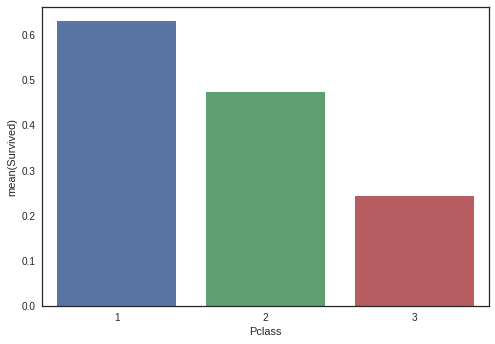

In [32]:
"""type between this"""
sns.set(style = "white")


"""type between this"""

sns.barplot(x = "Pclass", y = "Survived", data = df, ci = None)

## 動手試試看解答- 5

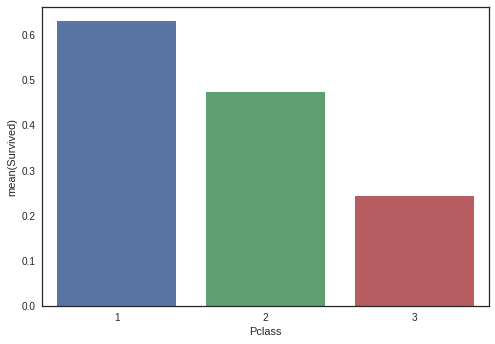

In [0]:
"""type between this"""

sns.set(style="white")

"""type between this"""

sns.barplot(x = "Pclass", y = "Survived", data = df, ci = None)

## Survived  與 SibSb 比較

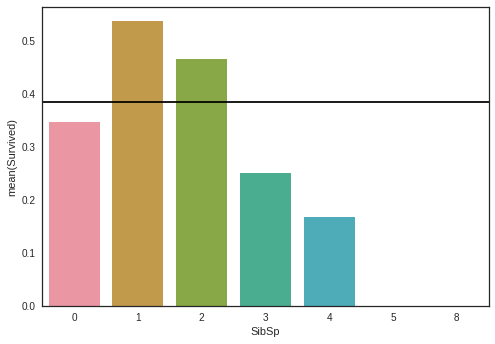

In [0]:
sns.barplot(y='Survived', x='SibSp', data=df, ci=None)
plt.hlines(df.Survived.mean(),xmin = -2, xmax = 10)

## 新增資料欄位- who

In [0]:
def who(row):
  if np.isnan(row['Age']):
    if row['Sex'] =='male':
      return 'man'
    else:
      return 'woman'
  if row['Age'] <15:
    return 'child'
  else:
    if row['Sex']=='male':
      return 'man'
    else:
      return 'woman'


df['who'] = df.apply(who, axis=1)

In [34]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,man
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


## Survived 與 Pclass 比較

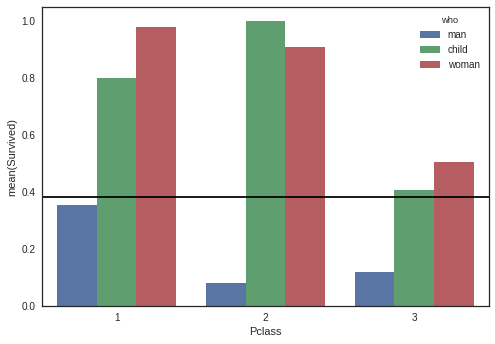

In [35]:
sns.barplot(y='Survived',x='Pclass',data=df, hue='who',hue_order=['man', 'child', 'woman'], ci=None)
plt.hlines(df.Survived.mean(), xmin = -1, xmax = 4)

## 各艙等的Who欄位資料比例

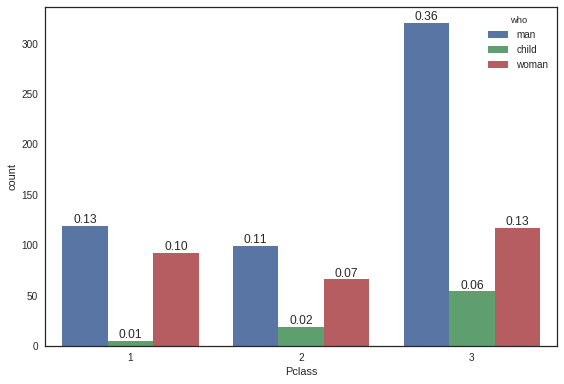

In [37]:
total = float(len(df)) # one person per row 
ax = sns.countplot(x="Pclass", hue="who", data=df, hue_order=['man', 'child', 'woman'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2f}'.format(height/total),
            ha="center") 
plt.tight_layout()

## Survived 與 Parch 比較

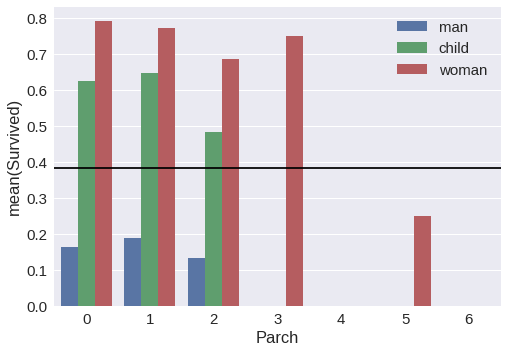

In [38]:
sns.set(font_scale = 1.5)
sns.barplot(y='Survived', x='Parch', hue = "who", data=df, hue_order=['man', 'child', 'woman'], ci=None)
plt.legend(loc='upper right')
plt.hlines(df.Survived.mean(),xmin = -2, xmax = 10)

## Sex 與 Age 對 Survived 的比較

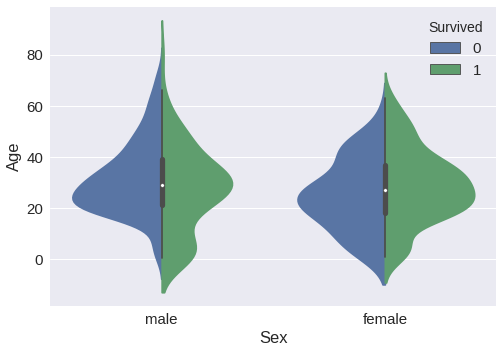

In [41]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True);

## Pclass 與 Age 對 Survived 的比較

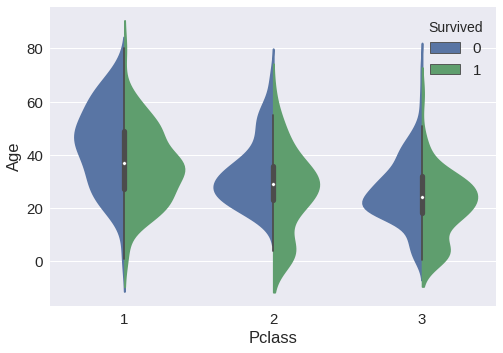

In [44]:
sns.set(font_scale = 1.5)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True);

## 動手試試看- 6

'type between this'

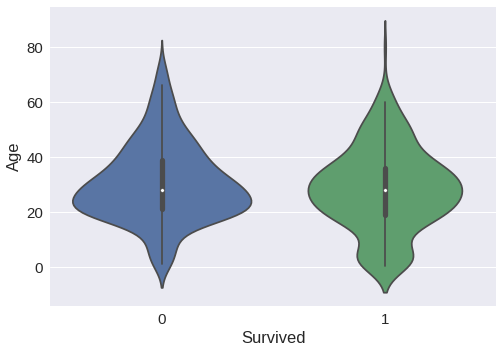

In [46]:
# 動手試試看(6)
sns.set(font_scale = 1.5)

"""type between this"""
sns.violinplot(x="Survived" , y = "Age", data=df)

df

"""type between this"""

## 動手試試看解答- 6

'type between this'

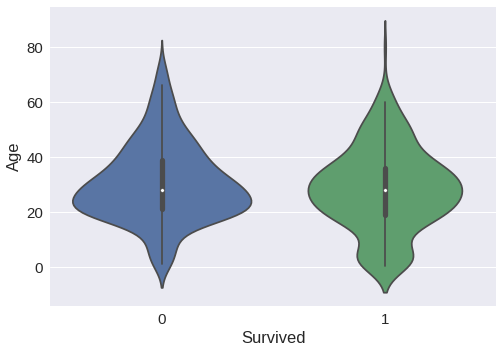

In [0]:
sns.set(font_scale = 1.5)

"""type between this"""

sns.violinplot(x="Survived", y = "Age", data=df)

"""type between this"""

# 結論

-  艙等會影響存活率，艙等越高，存活率越高

-  獨自一人存活率較低，但若親友太多也會降低存活率

-  小孩跟女人的存活率遠大於男人

-  雖然小孩存活率高，但男孩存活率大於女孩

-  Class1小孩少老人多，Class2的小孩都存活了

- Class1的年輕人存活率比老人高
